In [116]:
# Linux - install python3-pyaudio 
import sounddevice as sd
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

1. SYGNAŁ AUDIO

Zadanie 1

Głos: https://ttsmp3.com/

Zadanie 2

In [117]:
s, fs = sf.read('glos.mp3', dtype='float32')

# sd.play(s, fs)
# sd.wait()

Zadanie 3

Text(0.5, 0, 'Czas [ms]')

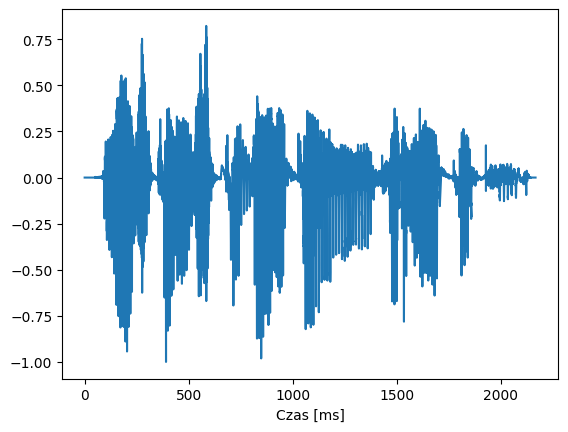

In [118]:
# sygnal_mono_lewy = s[:, 0] # jeśli stereo
# s = sygnal_mono_lewy
s /= np.max(np.abs(s)) # jeśli nie jest znormalizowany

czas_ms = len(s) / fs * 1000

x = np.linspace(0, czas_ms, len(s))

plt.plot(x, s);
plt.xlabel('Czas [ms]')
plt.xlim(np.linspace(0, czas_ms, 10))
